<a href="https://colab.research.google.com/github/chuongnm/customer_churn/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRE-PROCESSING

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload data
data_customer_sample_link = "/content/drive/MyDrive/VIB/dat_full5per.csv"
data_customer_sample=pd.read_csv(data_customer_sample_link)
data_customer_sample.head(5)

,Unnamed: 0,CUSTOMER_NUMBER,MONTH,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,...,AVG_LOAN_AMOUNT,COUNT_CREDITCARD,COUNT_DEBITCARD,total_TRANS_AMOUNT_Transfer,total_TRANS_NO_Transfer,total_TRANS_AMOUNT_Topup,total_TRANS_NO_Topup,total_TRANS_AMOUNT_Payment,total_TRANS_NO_Payment,noact
0,1,44,2019-04-30,M,2019-04-04,1990-08-08 00:00:00,N,2019-04-04,BRANCH,Y,...,600000000.0,0,1,0.0,0,0.0,0,0.0,0,0
1,2,44,2019-05-31,M,2019-04-04,1990-08-08 00:00:00,N,2019-04-04,BRANCH,Y,...,592850000.0,0,1,800000.0,1,0.0,0,0.0,0,0
2,3,44,2019-06-30,M,2019-04-04,1990-08-08 00:00:00,N,2019-04-04,BRANCH,Y,...,585700000.0,0,1,300000.0,1,0.0,0,0.0,0,0
3,4,44,2019-07-31,M,2019-04-04,1990-08-08 00:00:00,N,2019-04-04,BRANCH,Y,...,578550000.0,0,1,0.0,0,0.0,0,0.0,0,0
4,5,44,2019-08-31,M,2019-04-04,1990-08-08 00:00:00,N,2019-04-04,BRANCH,Y,...,571400000.0,0,1,0.0,0,0.0,0,0.0,0,0


In [ ]:
#remove columns without value for the model
data_customer_sample = data_customer_sample.drop(columns=['STAFF_VIB', 'IB_REGISTER_DATE', 'EB_REGISTER_CHANNEL', 'SMS', 'VERIFY_METHOD'])

In [ ]:
#convert object to date format
data_customer_sample['MONTH']=pd.to_datetime(data_customer_sample['MONTH'], infer_datetime_format=True)

#create month number for current and previous month
data_customer_sample['MONTH_NUMBER'] = data_customer_sample['MONTH'].dt.month
data_customer_sample['MONTH_NUMBER_T_1'] = data_customer_sample['MONTH_NUMBER'] + 1
data_customer_sample['MONTH_NUMBER_T_2'] = data_customer_sample['MONTH_NUMBER'] + 2
data_customer_sample['MONTH_NUMBER_T_3'] = data_customer_sample['MONTH_NUMBER'] + 3

In [ ]:
#create temp data for lag 1 month
temp_T_1 = data_customer_sample[['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_1',
                                 'COUNT_CA_ACCT', 'AVG_CA_BALANCE',
                                  'COUNT_TD_ACCT',  'AVG_TD_BALANCE',
                                  'COUNT_OF_LOAN',  'AVG_LOAN_AMOUNT',
                                  'COUNT_CREDITCARD',  'COUNT_DEBITCARD',
                                  'total_TRANS_AMOUNT_Transfer',  'total_TRANS_NO_Transfer',
                                  'total_TRANS_AMOUNT_Topup', 'total_TRANS_NO_Topup',
                                  'total_TRANS_AMOUNT_Payment', 'total_TRANS_NO_Payment']]

#change column name
temp_T_1.columns  = ['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_1',
                                 'COUNT_CA_ACCT1', 'AVG_CA_BALANCE1',
                                  'COUNT_TD_ACCT1',  'AVG_TD_BALANCE1',
                                  'COUNT_OF_LOAN1',  'AVG_LOAN_AMOUNT1',
                                  'COUNT_CREDITCARD1',  'COUNT_DEBITCARD1',
                                  'total_TRANS_AMOUNT_Transfer1',  'total_TRANS_NO_Transfer1',
                                  'total_TRANS_AMOUNT_Topup1', 'total_TRANS_NO_Topup1',
                                  'total_TRANS_AMOUNT_Payment1', 'total_TRANS_NO_Payment1']

#map main data with data for lag 1 month
dat = pd.merge(data_customer_sample, temp_T_1,  how='left',
                left_on=['CUSTOMER_NUMBER', 'MONTH_NUMBER'], right_on = ['CUSTOMER_NUMBER', 'MONTH_NUMBER_T_1'])

In [ ]:
#create temp data for lag 2 month
temp_T_2 = data_customer_sample[['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_2',
                                 'COUNT_CA_ACCT', 'AVG_CA_BALANCE',
                                  'COUNT_TD_ACCT',  'AVG_TD_BALANCE',
                                  'COUNT_OF_LOAN',  'AVG_LOAN_AMOUNT',
                                  'COUNT_CREDITCARD',  'COUNT_DEBITCARD',
                                  'total_TRANS_AMOUNT_Transfer',  'total_TRANS_NO_Transfer',
                                  'total_TRANS_AMOUNT_Topup', 'total_TRANS_NO_Topup',
                                  'total_TRANS_AMOUNT_Payment', 'total_TRANS_NO_Payment']]

#change column name
temp_T_2.columns  = ['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_2',
                                 'COUNT_CA_ACCT2', 'AVG_CA_BALANCE2',
                                  'COUNT_TD_ACCT2',  'AVG_TD_BALANCE2',
                                  'COUNT_OF_LOAN2',  'AVG_LOAN_AMOUNT2',
                                  'COUNT_CREDITCARD2',  'COUNT_DEBITCARD2',
                                  'total_TRANS_AMOUNT_Transfer2',  'total_TRANS_NO_Transfer2',
                                  'total_TRANS_AMOUNT_Topup2', 'total_TRANS_NO_Topup2',
                                  'total_TRANS_AMOUNT_Payment2', 'total_TRANS_NO_Payment2']

#map main data with data for lag 2 month
dat = pd.merge(dat, temp_T_2,  how='left',
                left_on=['CUSTOMER_NUMBER', 'MONTH_NUMBER'], right_on = ['CUSTOMER_NUMBER', 'MONTH_NUMBER_T_2'])

In [ ]:
#create temp data for lag 3 month
temp_T_3 = data_customer_sample[['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_3',
                                 'COUNT_CA_ACCT', 'AVG_CA_BALANCE',
                                  'COUNT_TD_ACCT',  'AVG_TD_BALANCE',
                                  'COUNT_OF_LOAN',  'AVG_LOAN_AMOUNT',
                                  'COUNT_CREDITCARD',  'COUNT_DEBITCARD',
                                  'total_TRANS_AMOUNT_Transfer',  'total_TRANS_NO_Transfer',
                                  'total_TRANS_AMOUNT_Topup', 'total_TRANS_NO_Topup',
                                  'total_TRANS_AMOUNT_Payment', 'total_TRANS_NO_Payment']]

#change column name
temp_T_3.columns  = ['CUSTOMER_NUMBER',  'MONTH_NUMBER_T_3',
                                 'COUNT_CA_ACCT3', 'AVG_CA_BALANCE3',
                                  'COUNT_TD_ACCT3',  'AVG_TD_BALANCE3',
                                  'COUNT_OF_LOAN3',  'AVG_LOAN_AMOUNT3',
                                  'COUNT_CREDITCARD3',  'COUNT_DEBITCARD3',
                                  'total_TRANS_AMOUNT_Transfer3',  'total_TRANS_NO_Transfer3',
                                  'total_TRANS_AMOUNT_Topup3', 'total_TRANS_NO_Topup3',
                                  'total_TRANS_AMOUNT_Payment3', 'total_TRANS_NO_Payment3']

#map main data with data for lag 2 month
dat = pd.merge(dat, temp_T_3,  how='left',
                left_on=['CUSTOMER_NUMBER', 'MONTH_NUMBER'], right_on = ['CUSTOMER_NUMBER', 'MONTH_NUMBER_T_3'])

In [ ]:
#create a column for tenure
dat['TENURE'] = dat['MONTH'] - pd.to_datetime(data_customer_sample['CLIENT_CREATE_DATE'], infer_datetime_format=True)
dat['TENURE'] = dat['TENURE'].astype('timedelta64[D]')/30

In [ ]:
#remove wrong data for birthday
dat = dat.loc[(dat['DATE_OF_BIRTH']!='0199-12-13 00:00:00')&\
                          (dat['DATE_OF_BIRTH']!='0199-12-26 00:00:00')&\
                          (dat['DATE_OF_BIRTH']!='0996-07-28 00:00:00')&\
                          (dat['DATE_OF_BIRTH']!='1061-06-12 00:00:00')&\
                          (dat['DATE_OF_BIRTH']!='1665-04-19 00:00:00')]
dat['AGE'] = dat['MONTH'] - pd.to_datetime(dat['DATE_OF_BIRTH'], infer_datetime_format=True)
dat['AGE'] = dat['AGE'].astype('timedelta64[D]')/365

dat[['AGE']].describe()
dat2 = dat[dat['AGE'].notna()]
dat2 = dat2[dat2['AGE'] > 10 ]
dat2 = dat2[dat2['AGE'] < 100 ]

In [ ]:
#remove duplicated columns
dat2 = dat2[dat2.columns.drop(list(dat2.filter(regex='MONTH_NUMBER_T')))]

In [ ]:
#remove na value
dat2 = dat2.dropna()

In [ ]:
dat2.head(5)

,Unnamed: 0,CUSTOMER_NUMBER,MONTH,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,ranif,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,...,COUNT_CREDITCARD3,COUNT_DEBITCARD3,total_TRANS_AMOUNT_Transfer3,total_TRANS_NO_Transfer3,total_TRANS_AMOUNT_Topup3,total_TRANS_NO_Topup3,total_TRANS_AMOUNT_Payment3,total_TRANS_NO_Payment3,TENURE,AGE
3,4,44,2019-07-31,M,2019-04-04,1990-08-08 00:00:00,1,1,951216.77,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.933333,28.997260
4,5,44,2019-08-31,M,2019-04-04,1990-08-08 00:00:00,1,1,2168130.42,0,...,0.0,1.0,800000.0,1.0,0.0,0.0,0.0,0.0,4.966667,29.082192
5,6,44,2019-09-30,M,2019-04-04,1990-08-08 00:00:00,1,1,930939.07,0,...,0.0,1.0,300000.0,1.0,0.0,0.0,0.0,0.0,5.966667,29.164384
6,7,44,2019-10-31,M,2019-04-04,1990-08-08 00:00:00,1,1,416282.52,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,29.249315
7,8,44,2019-11-30,M,2019-04-04,1990-08-08 00:00:00,1,1,292563.33,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,29.331507


#DEPLOY LOGISTIC MODEL

In [ ]:
#export correlation matrix to detect variables with high correlations
x = dat2.corr()
x.to_csv("/content/drive/MyDrive/VIB/corr.csv")

<ipython-input-56-fa4b0bdf138f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = dat2.corr()


In [ ]:
#import package for models
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices #model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

use "noact" as respone varialbe and the rest of data will be explainatary varialbe

noact = 0 mean having transaction in month and not churn

noact = 1 mean no transaction in month and churn

In [ ]:
#check full model result
y, X = dmatrices('noact ~ C(CLIENT_SEX)+ TENURE + I(TENURE**2) + AGE + I(AGE**2) + C(MONTH_NUMBER)+\
                          AVG_CA_BALANCE1 + AVG_CA_BALANCE2 + AVG_CA_BALANCE3 + \
                          AVG_TD_BALANCE1 + AVG_TD_BALANCE2 + AVG_TD_BALANCE3 + \
                          AVG_LOAN_AMOUNT1 + AVG_LOAN_AMOUNT2 + AVG_LOAN_AMOUNT3 + \
                          total_TRANS_NO_Transfer1 + total_TRANS_NO_Transfer2 + total_TRANS_NO_Transfer3 + \
                          total_TRANS_NO_Topup1 + total_TRANS_NO_Topup2 + total_TRANS_NO_Topup3 + \
                          total_TRANS_NO_Payment1 + total_TRANS_NO_Payment2 + total_TRANS_NO_Payment3 +\
                          COUNT_CA_ACCT1 + COUNT_CA_ACCT2 + COUNT_CA_ACCT3 + \
                          COUNT_TD_ACCT1 + COUNT_TD_ACCT2 + COUNT_TD_ACCT3 + \
                          COUNT_OF_LOAN1 + COUNT_OF_LOAN2 + COUNT_OF_LOAN3 + \
                          COUNT_CREDITCARD1 + COUNT_CREDITCARD2 + COUNT_CREDITCARD3 + \
                          COUNT_DEBITCARD1 + COUNT_DEBITCARD2 + COUNT_DEBITCARD3',
                  dat2, return_type="dataframe")
print (X.columns)

model_full = sm.Logit(y,X)
result_full = model_full.fit()
print(result_full.summary())

Index(['Intercept', 'C(CLIENT_SEX)[T.M]', 'C(MONTH_NUMBER)[T.5]',
       'C(MONTH_NUMBER)[T.6]', 'C(MONTH_NUMBER)[T.7]', 'C(MONTH_NUMBER)[T.8]',
       'C(MONTH_NUMBER)[T.9]', 'C(MONTH_NUMBER)[T.10]',
       'C(MONTH_NUMBER)[T.11]', 'C(MONTH_NUMBER)[T.12]', 'TENURE',
       'I(TENURE ** 2)', 'AGE', 'I(AGE ** 2)', 'AVG_CA_BALANCE1',
       'AVG_CA_BALANCE2', 'AVG_CA_BALANCE3', 'AVG_TD_BALANCE1',
       'AVG_TD_BALANCE2', 'AVG_TD_BALANCE3', 'AVG_LOAN_AMOUNT1',
       'AVG_LOAN_AMOUNT2', 'AVG_LOAN_AMOUNT3', 'total_TRANS_NO_Transfer1',
       'total_TRANS_NO_Transfer2', 'total_TRANS_NO_Transfer3',
       'total_TRANS_NO_Topup1', 'total_TRANS_NO_Topup2',
       'total_TRANS_NO_Topup3', 'total_TRANS_NO_Payment1',
       'total_TRANS_NO_Payment2', 'total_TRANS_NO_Payment3', 'COUNT_CA_ACCT1',
       'COUNT_CA_ACCT2', 'COUNT_CA_ACCT3', 'COUNT_TD_ACCT1', 'COUNT_TD_ACCT2',
       'COUNT_TD_ACCT3', 'COUNT_OF_LOAN1', 'COUNT_OF_LOAN2', 'COUNT_OF_LOAN3',
       'COUNT_CREDITCARD1', 'COUNT_CREDITCARD2

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.262803
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  noact   No. Observations:                47245
Model:                          Logit   Df Residuals:                    47198
Method:                           MLE   Df Model:                           46
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.5703
Time:                        20:02:35   Log-Likelihood:                -12416.
converged:                       True   LL-Null:                       -28896.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.3162      0.231     14.350      0.000       2.86

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


The full model show that
- In November and December, there are likely more churn than April
- Average Balance of Checking Account of last month influence strongly   


In [ ]:
#remove insignificant variables to optimize the model and check the result again
y, X = dmatrices('noact ~ C(CLIENT_SEX)+ TENURE  + AGE + I(AGE**2) + C(MONTH_NUMBER) +\
                          AVG_CA_BALANCE1 + \
                          AVG_TD_BALANCE2 + \
                          AVG_LOAN_AMOUNT1 + \
                          total_TRANS_NO_Transfer1 + \
                          total_TRANS_NO_Topup1 + \
                          COUNT_CA_ACCT1 + \
                          COUNT_TD_ACCT1 + \
                          COUNT_OF_LOAN1 + \
                          COUNT_CREDITCARD1 + \
                          COUNT_DEBITCARD1 ',
                  dat2, return_type="dataframe")
print (X.columns)

model_optimize = sm.Logit(y,X)
result4 = model_optimize.fit()
print(result4.summary())

Index(['Intercept', 'C(CLIENT_SEX)[T.M]', 'C(MONTH_NUMBER)[T.5]',
       'C(MONTH_NUMBER)[T.6]', 'C(MONTH_NUMBER)[T.7]', 'C(MONTH_NUMBER)[T.8]',
       'C(MONTH_NUMBER)[T.9]', 'C(MONTH_NUMBER)[T.10]',
       'C(MONTH_NUMBER)[T.11]', 'C(MONTH_NUMBER)[T.12]', 'TENURE', 'AGE',
       'I(AGE ** 2)', 'AVG_CA_BALANCE1', 'AVG_TD_BALANCE2', 'AVG_LOAN_AMOUNT1',
       'total_TRANS_NO_Transfer1', 'total_TRANS_NO_Topup1', 'COUNT_CA_ACCT1',
       'COUNT_TD_ACCT1', 'COUNT_OF_LOAN1', 'COUNT_CREDITCARD1',
       'COUNT_DEBITCARD1'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.269194
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  noact   No. Observations:                47245
Model:                          Logit   Df Residuals:                    47222
Method:                           MLE   Df Model:                           22
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.5599
Time:                        20:02:37   Log-Likelihood:                -12718.
converged:                       True   LL-Null:                       -28896.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6206      0.196     18.456      0.000       3.23

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#set y and x in mode
y, X = dmatrices('noact ~ C(CLIENT_SEX)+ TENURE + I(TENURE**2) + AGE + I(AGE**2) + C(MONTH_NUMBER)+\
                          AVG_CA_BALANCE1 + AVG_CA_BALANCE2 + AVG_CA_BALANCE3 + \
                          AVG_TD_BALANCE1 + AVG_TD_BALANCE2 + AVG_TD_BALANCE3 + \
                          AVG_LOAN_AMOUNT1 + AVG_LOAN_AMOUNT2 + AVG_LOAN_AMOUNT3 + \
                          total_TRANS_NO_Transfer1 + total_TRANS_NO_Transfer2 + total_TRANS_NO_Transfer3 + \
                          total_TRANS_NO_Topup1 + total_TRANS_NO_Topup2 + total_TRANS_NO_Topup3 + \
                          total_TRANS_NO_Payment1 + total_TRANS_NO_Payment2 + total_TRANS_NO_Payment3 +\
                          COUNT_CA_ACCT1 + COUNT_CA_ACCT2 + COUNT_CA_ACCT3 + \
                          COUNT_TD_ACCT1 + COUNT_TD_ACCT2 + COUNT_TD_ACCT3 + \
                          COUNT_OF_LOAN1 + COUNT_OF_LOAN2 + COUNT_OF_LOAN3 + \
                          COUNT_CREDITCARD1 + COUNT_CREDITCARD2 + COUNT_CREDITCARD3 + \
                          COUNT_DEBITCARD1 + COUNT_DEBITCARD2 + COUNT_DEBITCARD3',
                  dat2, return_type="dataframe")

#break down data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#deploy model
model_optimize = LogisticRegression()
model_optimize = model_optimize.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#preidct y base on X_test
predicted = model_optimize.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[9691  173]
 [1769 2541]]


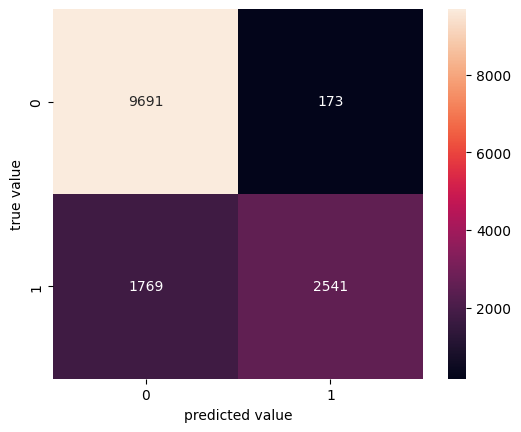

In [ ]:
#check confusion matrix
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
#check
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      9864
         1.0       0.94      0.59      0.72      4310

    accuracy                           0.86     14174
   macro avg       0.89      0.79      0.82     14174
weighted avg       0.87      0.86      0.85     14174



#PREDICTED RESULT

In [ ]:
predicted_full = model_optimize.predict(X)
predicted_proba = model_optimize.predict_proba(X)[:,1]
dat2['churn_prediction'] = predicted_full.tolist()
dat2['churn_proba'] = predicted_proba.tolist()
dat2

,Unnamed: 0,CUSTOMER_NUMBER,MONTH,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,ranif,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,...,total_TRANS_AMOUNT_Transfer3,total_TRANS_NO_Transfer3,total_TRANS_AMOUNT_Topup3,total_TRANS_NO_Topup3,total_TRANS_AMOUNT_Payment3,total_TRANS_NO_Payment3,TENURE,AGE,churn_prediction,churn_proba
3,4,44,2019-07-31,M,2019-04-04,1990-08-08 00:00:00,1,1,951216.77,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.933333,28.997260,0.0,4.112890e-08
4,5,44,2019-08-31,M,2019-04-04,1990-08-08 00:00:00,1,1,2168130.42,0,...,800000.0,1.0,0.0,0.0,0.0,0.0,4.966667,29.082192,0.0,2.008480e-07
5,6,44,2019-09-30,M,2019-04-04,1990-08-08 00:00:00,1,1,930939.07,0,...,300000.0,1.0,0.0,0.0,0.0,0.0,5.966667,29.164384,0.0,3.356441e-08
6,7,44,2019-10-31,M,2019-04-04,1990-08-08 00:00:00,1,1,416282.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,29.249315,0.0,2.913652e-07
7,8,44,2019-11-30,M,2019-04-04,1990-08-08 00:00:00,1,1,292563.33,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,29.331507,0.0,8.041333e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87853,87854,999871,2019-09-30,M,2019-03-26,1981-11-24 00:00:00,1,1,733062.27,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.266667,37.873973,0.0,2.807602e-04
87854,87855,999871,2019-10-31,M,2019-03-26,1981-11-24 00:00:00,1,1,494485.35,0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.300000,37.958904,0.0,4.668589e-04
87855,87856,999871,2019-11-30,M,2019-03-26,1981-11-24 00:00:00,1,1,268397.33,0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.300000,38.041096,0.0,7.755601e-04
87856,87857,999871,2019-12-31,M,2019-03-26,1981-11-24 00:00:00,1,1,740189.39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.333333,38.126027,0.0,1.262307e-03


In [ ]:
dat2.to_csv('/content/drive/MyDrive/VIB/churn_prediction.csv')